# Day 0: Mission Data Simulation

We will be generating a synthetic dataset (mission_data.csv) that contains records of fictional space missions — each row is a mission, each column is a feature (e.g., crew size, fuel level, solar flare risk).

We're also simulating the outcome of each mission (success/failure, or score %) using rules and randomness — just like real-world systems that are partly predictable, partly chaotic.

## Import and Reproducibility Set-Up

In [1]:
# Basic setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(42)  # Reproducibility


## Generate Mission Data

In [2]:
# Number of missions
n = 1000

# Simulate features
mission_id = [f"MSN_{i:04d}" for i in range(n)]
crew_size = np.random.randint(2, 10, n)
mission_duration = np.random.normal(loc=180, scale=30, size=n).astype(int)
distance_km = np.random.normal(loc=300, scale=50, size=n)  # in million km
solar_flare_risk = np.clip(np.random.beta(2, 5, n), 0, 1)
fuel_capacity = np.random.normal(loc=800, scale=120, size=n)
oxygen_reserve = np.random.normal(loc=100, scale=15, size=n)
launch_day_temp = np.random.normal(loc=22, scale=5, size=n)
mental_health_score = np.clip(np.random.normal(loc=0.8, scale=0.1, size=n), 0, 1)
comm_delay = np.random.normal(loc=8, scale=2, size=n)
anomaly_detected = np.random.choice([0, 1], size=n, p=[0.8, 0.2])
mission_type = np.random.choice(["exploration", "resupply", "rescue"], size=n, p=[0.5, 0.3, 0.2])

# Mission success score formula (0–100)
success_score = (
    0.3 * (400 - distance_km) +
    0.2 * fuel_capacity +
    25 * mental_health_score +
    -60 * solar_flare_risk +
    -35 * anomaly_detected +
    np.random.normal(0, 10, n)  # noise
)

mission_success_score = np.clip(success_score / 10, 0, 100)


## Create DataFrame

In [3]:
# Combine into DataFrame
mission_df = pd.DataFrame({
    "mission_id": mission_id,
    "crew_size": crew_size,
    "mission_duration": mission_duration,
    "distance_km": distance_km,
    "solar_flare_risk": solar_flare_risk,
    "fuel_capacity": fuel_capacity,
    "oxygen_reserve": oxygen_reserve,
    "launch_day_temp": launch_day_temp,
    "mental_health_score": mental_health_score,
    "comm_delay": comm_delay,
    "anomaly_detected": anomaly_detected,
    "mission_type": mission_type,
    "mission_success_score": mission_success_score
})

mission_df.head()

,mission_id,crew_size,mission_duration,distance_km,solar_flare_risk,fuel_capacity,oxygen_reserve,launch_day_temp,mental_health_score,comm_delay,anomaly_detected,mission_type,mission_success_score
0,MSN_0000,8,190,365.087064,0.320381,829.934114,130.730624,10.074432,0.818863,11.089683,0,resupply,19.190786
1,MSN_0001,5,236,378.075560,0.075308,847.907383,75.617616,19.173706,0.960807,9.208195,0,resupply,19.836566
2,MSN_0002,6,208,301.600207,0.416936,1099.062080,91.648318,12.940053,0.696440,10.722013,1,rescue,19.066117
3,MSN_0003,8,162,262.329106,0.287994,766.985429,100.489583,17.246547,0.888106,8.129583,0,exploration,20.467528
4,MSN_0004,4,153,322.998607,0.204623,761.868693,117.060716,6.307427,0.804730,9.530875,0,exploration,17.168499


**Feature Description: Mission Data Dictionary**

| Feature Name           | Description                                           | Unit                      |
|------------------------|-------------------------------------------------------|---------------------------|
| `mission_id`           | Unique mission identifier                            | —                         |
| `crew_size`            | Number of astronauts on board                         | persons                   |
| `mission_duration`     | Total mission time                                    | days                      |
| `distance_km`          | Distance to target celestial body                     | million kilometers (10⁶ km) |
| `solar_flare_risk`     | Estimated solar flare disruption risk (scaled)        | 0 to 1 (probability)      |
| `fuel_capacity`        | Fuel loaded for mission                               | liters                    |
| `oxygen_reserve`       | Total available oxygen per crew member                | days                      |
| `launch_day_temp`      | Temperature at launch site                            | degrees Celsius (°C)      |
| `mental_health_score`  | Psychological fitness of the crew                     | 0 to 1 (normalized score) |
| `comm_delay`           | Delay in communication from Earth                     | minutes                   |
| `anomaly_detected`     | Whether a technical anomaly was detected              | 0 = No, 1 = Yes           |
| `mission_type`         | Category of mission objective                         | exploration / resupply / rescue |
| `mission_success_score`| Overall outcome success rating                        | 0 to 100 (percent score)  |


## Visualize Key Features

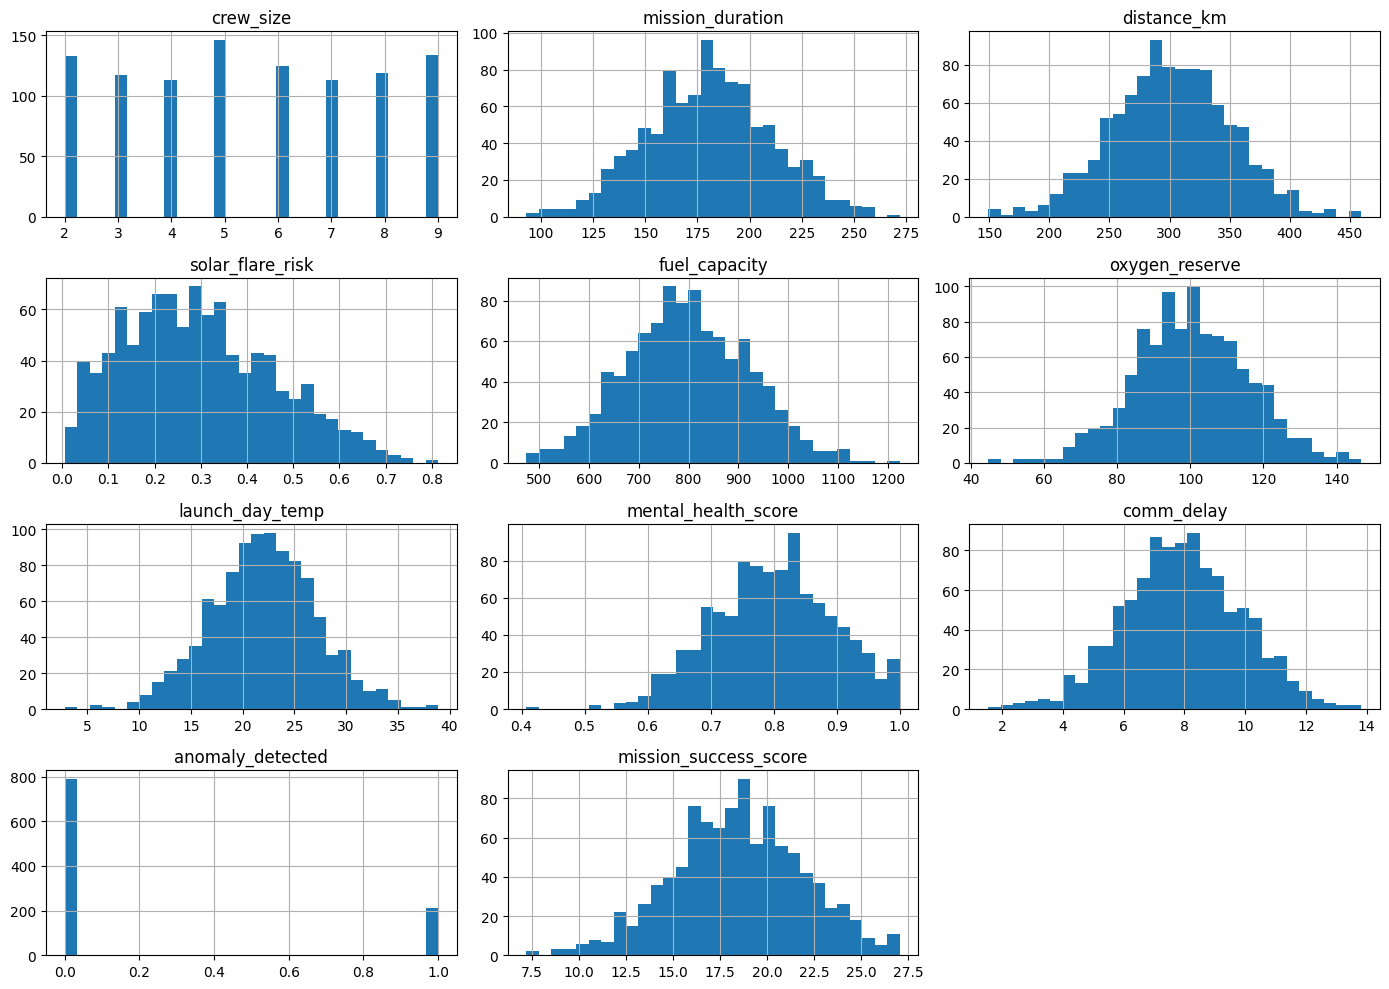

In [4]:
# Quick overview
mission_df.describe()

# Histograms
mission_df.hist(figsize=(14, 10), bins=30)
plt.tight_layout()
plt.show()

## Pair Plot
This helps visually explore relationships between multiple features in your dataset.

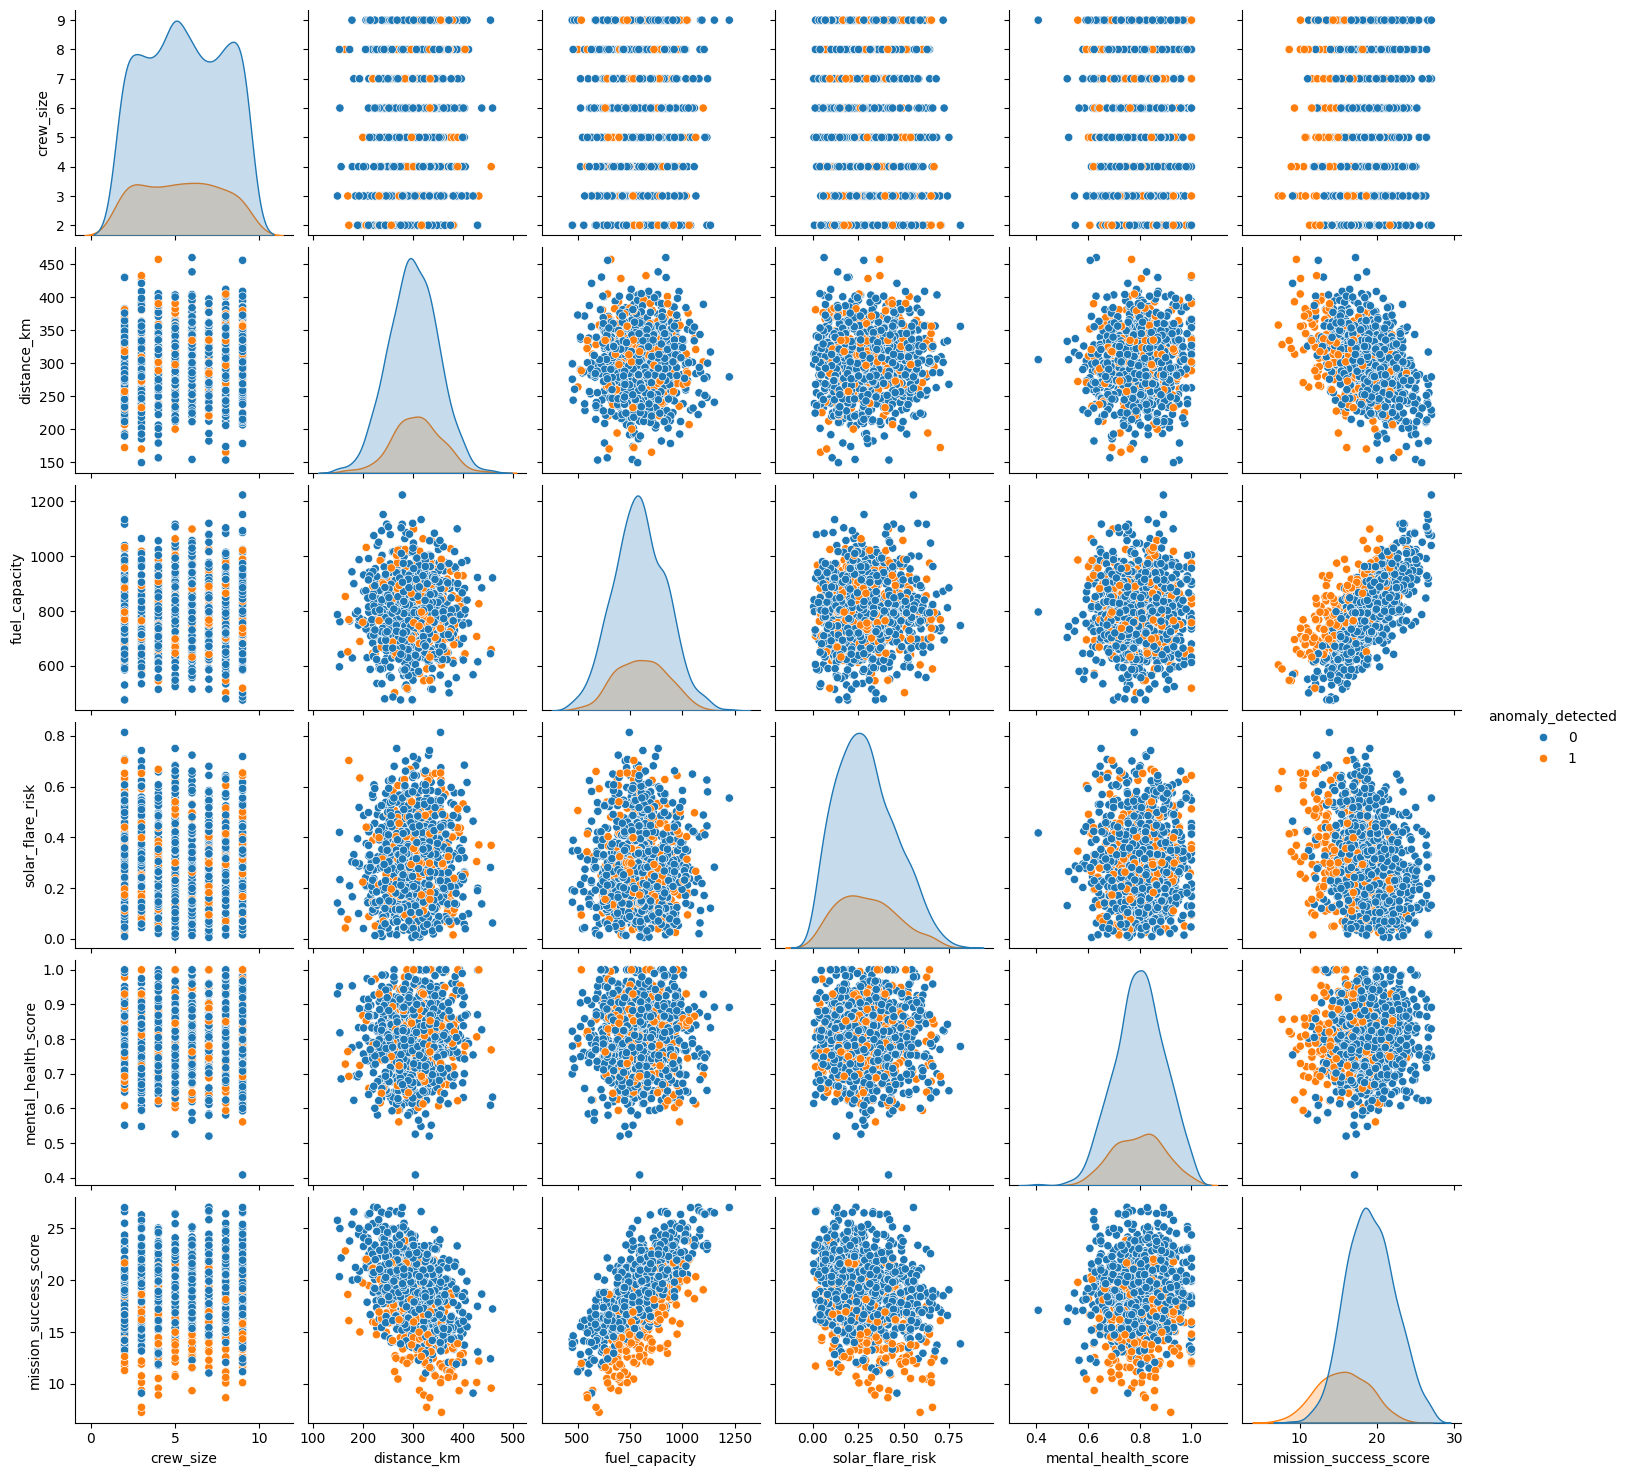

In [5]:
# Select a few relevant features
sns.pairplot(mission_df[[
    "crew_size", "distance_km", "fuel_capacity", 
    "solar_flare_risk", "mental_health_score", 
    "anomaly_detected", "mission_success_score"
]], hue="anomaly_detected")
plt.show()

## Save as CSV

In [8]:
# Save to /data folder
import os
os.makedirs("data", exist_ok=True)
mission_df.to_csv("data/mission_data.csv", index=False)

print("Done. Saved.")

Done. Saved.


## Reflection: Why Simulate Mission Data?

This dataset is our foundation. It is a fictional, structured representation of what an AI system might learn from in a real mission control environment.

By designing the data ourselves, we not only control the complexity and relationships between variables, but also gain intuition about what impacts outcomes — like how fuel, mental health, or anomalies affect mission success.

In the next few days, we’ll use this dataset to build increasingly intelligent models that learn from these patterns and make meaningful predictions.

Let the mission begin! 